In [12]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import random


[-4.51341463 -2.47298311 -0.43255159  1.60787992  3.64831144  5.68874296
  7.72917448  9.769606   11.81003752 13.85046904 15.89090056 17.93133208
 19.9717636  22.01219512 24.05262664 26.09305816 28.13348968 30.1739212
 32.21435272 34.25478424 36.29521576 38.33564728 40.3760788  42.41651032
 44.45694184 46.49737336 48.53780488 50.5782364  52.61866792 54.65909944
 56.69953096 58.73996248 60.780394   62.82082552 64.86125704 66.90168856
 68.94212008 70.98255159 73.02298311 75.06341463]


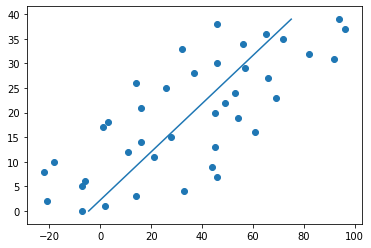

In [13]:
def create_dataset(hm,variance,step=2,correlation=False):
    val=1
    ys=[]
    for i in range(hm):
        y=val+random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation=='pos':
            val+=step
        elif correlation and correlation=='neg':
            val-=step
        xs=[i for i in range(len (ys))]
    return np.array(xs,dtype=np.float64),np.array(ys,dtype=np.float64)

def best_fit_slope(xs,ys):
    m=(mean(xs)*mean(ys)-mean(xs*ys))/(mean(xs)**2-mean(xs*xs)) #不能使用^2，type不匹配
    b=mean(ys)-mean(xs)*m
    return m,b

xs,ys=create_dataset(40,40,2,correlation='pos')
m,b=best_fit_slope(xs,ys)

y_predict=m*xs+b
print(y_predict)

plt.plot(y_predict,xs)
plt.scatter(ys,xs)

In [14]:
def squared_error(ys_orig,ys_predict):
    return sum((ys_orig-ys_predict)**2)
def R_squared(ys_orig,ys_predict):
    y_mean=[mean(ys_orig) for y in ys_orig]
    squared_error_y_regr=squared_error(ys_orig,ys_predict)
    squared_error_y_mean=squared_error(ys_orig,y_mean)
    return 1-squared_error_y_regr/squared_error_y_mean

In [15]:
r_squared=R_squared(ys,y_predict)
print(r_squared)

0.5497653041479513
